#Web scraping


##Análise:


Vamos usar de exemplo o seguinte
[artigo web sobre os 100 melhores filmes listados pelo Instituto Americano de Cinema](https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Movies).

*  Esse artigo está na Wikipedia e, na lateral direita da página, temos uma tabela contendo outros artigos criados pelo mesmo instituto, de 1998 a 2008. Há uma versão atualizada de 2007 do nosso artigo em questão, mas verificaremos a de 1988 primeiro.

*  Descendo a página, encontramos uma tabela interessante para o projeto, contendo as seguintes colunas: nome do filme, ano de lançamento, diretor, produtora e a posição no ranking, indo do primeiro ao centésimo lugar.

*  Por fim, mais abaixo na página, encontramos um quadro que parece uma tabela contendo apenas os nomes dos filmes, sua posição no ranking e seus respectivos links para a página da Wikipedia, onde podemos checar a sinopse e conhecer mais sobre eles.

##Checando a tabela


### - Explorando páginas com o Inspecionar elemento

Quando queremos extrair dados de uma página da web, o primeiro passo é **analisar seu código HTML**.  
Isso pode ser feito diretamente no navegador:

---

### 1️⃣ Acessando o código da página

- Clique com o **botão direito do mouse** em qualquer parte da página.  
- Selecione a opção **"Inspecionar"**.  
- Uma aba lateral será aberta exibindo o conteúdo da página em **HTML**.

---

### 2️⃣ Pesquisando elementos no HTML

- Pressione **Ctrl + F** dentro da aba de inspeção.  
- Digite o que deseja localizar.  

Exemplo: páginas com tabelas geralmente utilizam a tag **`<table>`**.  

Ao procurar por `<table>`, o navegador mostra todas as ocorrências dessa tag no código.


No **HTML**, as tabelas são estruturadas com várias tags além de `<table>`. Para localizar tabelas completas ou partes delas no **"Inspecionar"** ou no **código-fonte**, você pode procurar também por:

* **`<thead>`** → cabeçalho da tabela
* **`<tbody>`** → corpo da tabela
* **`<tr>`** → linha da tabela (table row)
* **`<th>`** → célula de cabeçalho (table header)
* **`<td>`** → célula de dados (table data)

---

### 3️⃣ Identificando as tabelas

- A caixa de busca indica o número de ocorrências da tag `<table>`.  
- Podemos navegar entre elas usando as setas ao lado da caixa de busca.  
- Assim, conseguimos identificar **qual tabela corresponde aos dados de interesse**.

---

✨ Esse passo é essencial antes de utilizarmos bibliotecas como `pandas` ou `BeautifulSoup`, pois precisamos **mapear exatamente onde estão os dados** que queremos extrair.


In [1]:
import pandas as pd

###Variável dados_html

In [2]:
dados_html = pd.read_html('https://raw.githubusercontent.com/YuriArduino/Estudos_Pandas/refs/heads/data-tests/filmes_wikipedia.html')

In [3]:
dados_html

[       0                      1
 0   1998             100 Movies
 1   1999              100 Stars
 2   2000             100 Laughs
 3   2001            100 Thrills
 4   2002           100 Passions
 5   2003  100 Heroes & Villains
 6   2004              100 Songs
 7   2005       100 Movie Quotes
 8   2005              25 Scores
 9   2006             100 Cheers
 10  2006            25 Musicals
 11  2007   100 Movies (Updated)
 12  2008        AFI's 10 Top 10
 13   vte                    vte,
                             Film  Release year              Director  \
 0                   Citizen Kane          1941          Orson Welles   
 1                     Casablanca          1942        Michael Curtiz   
 2                  The Godfather          1972  Francis Ford Coppola   
 3             Gone with the Wind          1939        Victor Fleming   
 4             Lawrence of Arabia          1962            David Lean   
 ..                           ...           ...                   

Aparentemente é uma lista, porque começa com colchetes. Primeiro temos os dados daquela primeira tabela, começando em 1998 e indo até 2008. Abaixo disso, temos os dados da segunda tabela e, por fim, os dados da terceira.

**Mas, por que não surgiu um dataframe?**

A função read_html() busca pelas tags <table> e transforma esses dataframes em uma lista. Ou seja, nossa lista contém os dataframes um abaixo do outro. Podemos confirmar isso ao verificar o tipo da variável criada, dados_html, executando o seguinte comando:

In [4]:
type(dados_html)

list

In [5]:
#Verificar quantos elementos temos nessa lista
len(dados_html)

3

###Acessando um dataframe específico

In [6]:
# Acessar um dataframe específico entre esses três,
#é necessário usar sua posição na lista
top_filmes = dados_html[1]
top_filmes

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5
...,...,...,...,...,...
95,The Searchers,1956,John Ford,C. V. Whitney Pictures,96
96,Bringing Up Baby,1938,Howard Hawks,RKO Radio Pictures,97
97,Unforgiven,1992,Clint Eastwood,The Malpaso Company,98
98,Guess Who's Coming to Dinner,1967,Stanley Kramer,Columbia Pictures,99


# Para saber mais: o que é HTML?

O **HTML (Hypertext Markup Language – Linguagem de Marcação de Hipertexto)** é o código usado para estruturar uma página web e seu conteúdo.

Ele é composto por **elementos (tags)** que delimitam ou agrupam partes do conteúdo, determinando **como esse conteúdo aparece** ou **como ele se comporta**.

---

## Estrutura básica de um documento HTML

Um documento HTML começa e termina com:

```html
<html>
   <head>
      <!-- informações sobre a página -->
   </head>
   <body>
      <!-- conteúdo da página -->
   </body>
</html>
````

* `<head>` → contém título e metadados (informações que não aparecem diretamente na página).
* `<body>` → contém todo o conteúdo visível da página.

---

## Principais tags

* `<h1>` a `<h6>` → títulos e subtítulos.
* `<p>` → parágrafos.
* `<ul>` e `<li>` → listas não ordenadas (bullet points).
* `<img>` → insere imagens.
* `<table>`, `<tr>`, `<th>`, `<td>` → criam tabelas.

---

## Atributos em HTML

As tags podem receber **atributos** para definir propriedades extras:

* `<img src="imagem.png">` → define o endereço da imagem.
* `<a href="https://exemplo.com">` → cria um link para outra página.

---

👉 O HTML é a **espinha dorsal da web**. Antes de extrairmos dados com Python, precisamos compreender como eles estão organizados nesse formato.
---------


#Escrevendo arquivos HTML

Escrever um arquivo no formato HTML pode ser especialmente útil quando você deseja compartilhar os seus dados com pessoas que não têm acesso à biblioteca Pandas ou outras ferramentas de carregamento de dados.

Os dados podem ser consultados diretamente no navegador ou incorporados numa página web, facilitando a visualização.

##Criando o arquivo HTML

In [7]:
top_filmes.to_html('top_filmes.html')

##Baixando e abrindo o arquivo HTML

No Colab, clique em Arquivos (ícone da pasta) no menu lateral esquerdo.

Localize o arquivo top_filmes.html, clique nos três pontos verticais ao lado dele e selecione Fazer download.

Abra o arquivo baixado no navegador: a tabela com os 100 filmes será exibida em colunas organizadas.

Utilizando os dados em outros formatos

O formato HTML permite visualizar a tabela no navegador e incorporá-la em páginas web.

Também é possível salvar os dados em CSV ou Excel, facilitando o tratamento e a análise posterior.



###Salvando em formato CSV

In [8]:
top_filmes.to_csv('top_filmes_1998.csv', index=False)
pd.read_csv('/content/top_filmes_1998.csv')

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5
...,...,...,...,...,...
95,The Searchers,1956,John Ford,C. V. Whitney Pictures,96
96,Bringing Up Baby,1938,Howard Hawks,RKO Radio Pictures,97
97,Unforgiven,1992,Clint Eastwood,The Malpaso Company,98
98,Guess Who's Coming to Dinner,1967,Stanley Kramer,Columbia Pictures,99


## Lendo/escrevendo arquivos XML



### O que é XML?

O termo **XML** vem de *Extensible Markup Language* (Linguagem de Marcação Estendida).
Sua estrutura de **tags** é bastante semelhante ao HTML.

### Estrutura de um arquivo XML

* O documento começa com uma **tag raiz**, que envolve todo o conteúdo.
* No exemplo, essa tag é `<data>`.
* Dentro dela, cada item é representado por uma **tag `<row>`** (linha).
* Cada linha contém várias **sub-tags**, que representam as colunas de informações.

### Exemplo de uma linha no XML

```xml
<data>
  <row>
    <index>0</index>
    <Poster_Link>https://m.media-amazon.com/images/...</Poster_Link>
    <Series_Title>The Shawshank Redemption</Series_Title>
    <Released_Year>1994</Released_Year>
    <Certificate>A</Certificate>
    <Runtime>142 min</Runtime>
    <Genre>Drama</Genre>
    <IMDB_Rating>9.3</IMDB_Rating>
    <Overview>Two imprisoned men bond over a number of years...</Overview>
    <Meta_score>80.0</Meta_score>
    <Director>Frank Darabont</Director>
    <Star1>Tim Robbins</Star1>
    <Star2>Morgan Freeman</Star2>
    <Star3>Bob Gunton</Star3>
    <Star4>William Sadler</Star4>
    <No_of_Votes>2343110</No_of_Votes>
    <Gross>28,341,469</Gross>
  </row>
</data>
```

### Observação

Todas as linhas seguintes seguem a **mesma estrutura**, apenas mudando os valores dentro das tags.

---
Perfeito! Aqui vai um comparativo simples e direto entre **HTML** e **XML**:

---

### Diferenças entre HTML e XML

| Aspecto             | HTML                                                               | XML                                                      |
| ------------------- | ------------------------------------------------------------------ | -------------------------------------------------------- |
| **Objetivo**        | Estruturar e exibir conteúdo em páginas web                        | Armazenar e transportar dados                            |
| **Tags**            | Predefinidas (ex: `<p>`, `<h1>`, `<table>`)                        | Definidas pelo usuário (ex: `<row>`, `<Series_Title>`)   |
| **Estrutura**       | Foca em como o conteúdo será exibido                               | Foca em descrever os dados de forma organizada           |
| **Obrigatoriedade** | Nem sempre exige fechamento correto de tags (browsers interpretam) | Exige fechamento correto de todas as tags                |
| **Exemplo**         | `<h1>Título</h1>`                                                  | `<Titulo>O Poderoso Chefão</Titulo>`                     |
| **Uso típico**      | Sites e aplicações web                                             | Troca de dados entre sistemas e integração de aplicações |

---

👉 Resumindo:

* **HTML = aparência e estrutura visual**
* **XML = organização e transporte de dados**

##Lendo um arquivo XML

In [9]:
url_2 = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Pandas/refs/heads/data-tests/imdb_top_1000.xml'
dados_imdb = pd.read_xml(url_2)
dados_imdb.head(3)

,index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


## Escrevendo um arquivo XML

In [10]:
dados_imdb.to_xml('filmes_imdb.xml', index=False)
pd.read_xml('/content/filmes_imdb.xml')

,index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,None
996,996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,None
997,997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,None,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,None



### Para saber mais: o que é XML?

XML (Extensible Markup Language) é uma linguagem de marcação usada para **criar e descrever dados de forma estruturada e padronizada**. Ela utiliza **tags** para definir elementos e **atributos** para adicionar informações extras.

A estrutura básica de um documento XML inclui:

* **Declaração inicial** → indica a versão, o encoding e o tipo do documento.
* **Elemento raiz** → contém todos os outros elementos.
* **Elementos filhos** → podem conter outros elementos ou texto.
* **Atributos** → fornecem detalhes adicionais sobre os elementos.

📌 **Exemplo de documento XML:**

```xml
<?xml version="1.0" encoding="UTF-8"?>
<animais>
  <animal nome="Mel" tipo="cachorro" cor="marrom"/>
  <animal nome="Vick" tipo="gato" cor="branco"/>
</animais>
```

🔎 Neste exemplo:

* `<animais>` é o **elemento raiz**.
* `<animal>` é um **elemento filho** com três atributos (*nome*, *tipo* e *cor*).
* **Mel** e **Vick** são os valores atribuídos a esses elementos.

---

#Exercício: lendo uma tabela de uma página web

Vanessa é uma cientista de dados que está realizando algumas análises com dados ambientais. Ela está desenvolvendo um projeto para avaliar o impacto ambiental das atividades humanas em diferentes países do mundo, mas para isso precisa das estimativas populacionais desses países. Ao pesquisar na internet, encontrou uma tabela de estimativas populacionais em um artigo da página [Wikipédia](https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_popula%C3%A7%C3%A3o).

Assim como Vanessa, seu desafio é obter um DataFrame da tabela que contém as informações do número de habitantes de cada país.

In [11]:
paises_populacao_html = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_popula%C3%A7%C3%A3o')
paises_populacao_html

HTTPError: HTTP Error 403: Forbidden

In [12]:
paises_populacao_html = pd.read_html('https://raw.githubusercontent.com/YuriArduino/Estudos_Pandas/refs/heads/data-tests/Lista%20de%20pa%C3%ADses%20por%20popula%C3%A7%C3%A3o%20%E2%80%93%20Wikip%C3%A9dia%2C%20a%20enciclop%C3%A9dia%20livre.html')
paises_populacao_html

[     Unnamed: 0 Posição    País (ou território dependente) Estimativa da ONU  \
 0           NaN       1                              Índia     1 417 492 000   
 1           NaN       2                      China[nota 1]     1.407.934.000   
 2           NaN       3                     Estados Unidos       342.181.000   
 3           NaN       4                          Indonésia       285.783.000   
 4           NaN       5                          Paquistão       256 204 000   
 ..          ...     ...                                ...               ...   
 245         NaN       –     Ilha de Ascensão (Reino Unido)             1 100   
 246         NaN     195                           Vaticano               879   
 247         NaN       –  Ilhas Cocos (Keeling) (Austrália)               605   
 248         NaN       –     Tristão da Cunha (Reino Unido)               264   
 249         NaN       –       Ilhas Pitcairn (Reino Unido)                67   
 
     Crescimento desde a ú

In [13]:
len(paises_populacao_html)

3

In [14]:
paises_populacao = paises_populacao_html[0]
paises_populacao

,Unnamed: 0,Posição,País (ou território dependente),Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,NaN,1,Índia,1 417 492 000,-12 692 000,Estimativa oficial
1,NaN,2,China[nota 1],1.407.934.000,-1 390 000,Censo oficial
2,NaN,3,Estados Unidos,342.181.000,-2 084 000,Censo oficial
3,NaN,4,Indonésia,285.783.000,+3 337 000,Estimativa oficial
4,NaN,5,Paquistão,256 204 000,+6 567 000,Estimativa oficial
...,...,...,...,...,...,...
245,NaN,–,Ilha de Ascensão (Reino Unido),1 100,NaN,Estimativa oficial[10]
246,NaN,195,Vaticano,879,NaN,Estimativa oficial
247,NaN,–,Ilhas Cocos (Keeling) (Austrália),605,NaN,Estimativa oficial
248,NaN,–,Tristão da Cunha (Reino Unido),264,NaN,Estimativa oficial[11]


In [15]:
# Para remover a coluna chamada "Unnamed: 0", uma possibilidade é usar o método .drop()
# e especificar o nome da coluna e axis=1
paises_populacao = paises_populacao.drop('Unnamed: 0', axis=1)
paises_populacao.head()


# 'Unnamed: 0' especifica o nome da coluna que será removida.
# axis=1 indica que a operação de exclusão deve ser feita ao longo das colunas
# inplace=True significa que a operação será aplicada diretamente ao DataFrame tabela
# sem a necessidade de criar um novo DataFrame.

,Posição,País (ou território dependente),Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,1,Índia,1 417 492 000,-12 692 000,Estimativa oficial
1,2,China[nota 1],1.407.934.000,-1 390 000,Censo oficial
2,3,Estados Unidos,342.181.000,-2 084 000,Censo oficial
3,4,Indonésia,285.783.000,+3 337 000,Estimativa oficial
4,5,Paquistão,256 204 000,+6 567 000,Estimativa oficial


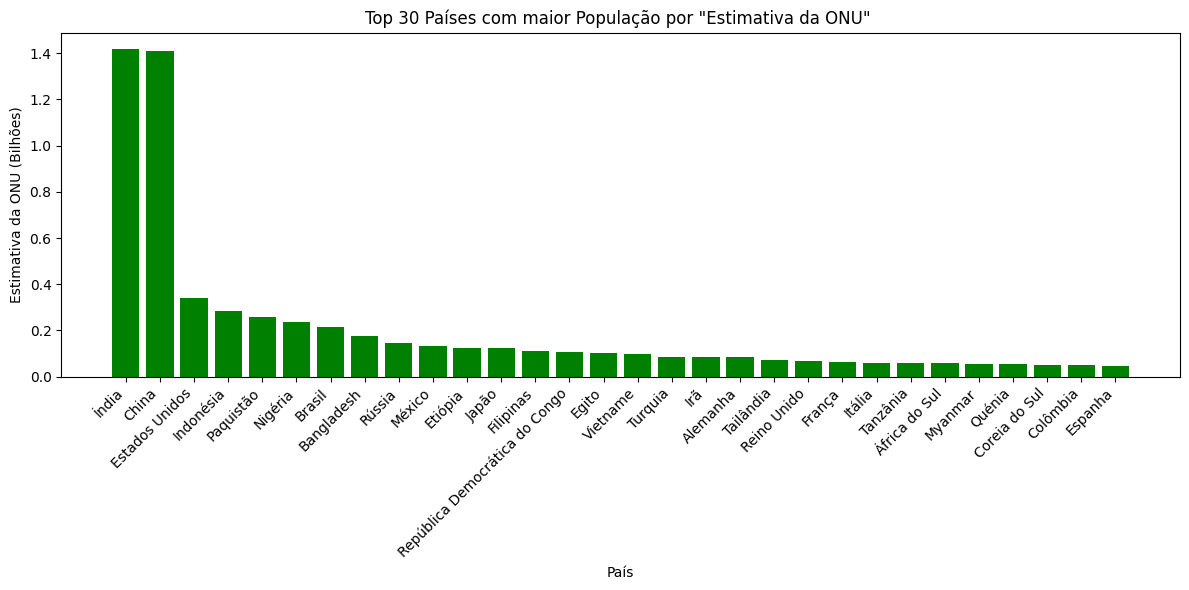

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# Limpa a coluna 'Estimativa da ONU': remove espaços e pontos, depois converte para numérico
paises_populacao['Estimativa da ONU Limpa'] = (
    paises_populacao['Estimativa da ONU']
    .astype(str)
    .str.replace(' ', '', regex=False)
    .str.replace('.', '', regex=False)
)
paises_populacao['Estimativa da ONU Limpa'] = pd.to_numeric(
    paises_populacao['Estimativa da ONU Limpa'], errors='coerce'
)

# Limpa a coluna 'País (ou território dependente)': remove o padrão [nota X]
paises_populacao['País (ou território dependente)'] = (
    paises_populacao['País (ou território dependente)']
    .str.replace(r'\[nota \d+\]', '', regex=True)
    .str.strip()
)

# Remove linhas onde a conversão para numérico falhou (se houver)
paises_populacao.dropna(subset=['Estimativa da ONU Limpa'], inplace=True)

# Classifica por população e seleciona os 30 principais países
top_30_paises = paises_populacao.sort_values(
    by='Estimativa da ONU Limpa', ascending=False
).head(30)

# Divide a população por 1 bilhão para exibir em bilhões
top_30_paises['Estimativa da ONU Limpa Bilhões'] = top_30_paises['Estimativa da ONU Limpa'] / 1_000_000_000


# Cria um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_30_paises['País (ou território dependente)'], top_30_paises['Estimativa da ONU Limpa Bilhões'], color='green')
plt.xlabel('País')
plt.ylabel('Estimativa da ONU (Bilhões)')
plt.title('Top 30 Países com maior População por "Estimativa da ONU" ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Formata os rótulos do eixo y para não usar notação científica usando matplotlib.ticker
# (Mantido caso queira ajustar a formatação de outra forma no futuro, mas a divisão já simplifica)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=False))
plt.ticklabel_format(style='plain', axis='y')


plt.show()